# Sentiment Analysis of Elon Musk's Tweets
This project focuses on performing sentiment analysis of tweets posted by Elon Musk, one of the most influential entrepreneurs and visionaries of our time. Through tweet processing and analysis, we aim to gain valuable insights into the sentiments expressed in his tweets and their impact on public perception.

 
## Notebook Contents.

### 1. Data preview

### 2. Data Preparation: 
    -This section includes code and resources for cleaning and preprocessing the tweets, including the removal of mentions, URLs, and unwanted symbols.

    -While also including a data pre processing section focused on feature engineering.
    
### 3. Exploratory Analysis:

### Sentiment Analysis: 
    -Here, you will find the code for conducting sentiment analysis of the tweets using natural language processing techniques. This will enable us to classify the tweets as positive, negative, or neutral.

### Results Visualization: 
In this section, interactive visualizations of the sentiment analysis results are provided. This will help us understand trends and changes in sentiment over time.

### Research Questions:

### Conclusions:

## 1. Data preview

    -Import the necessary python libriaries
    -General oversee of what the data looks like (# Columns, Data types, NaN check)

In [1]:
# Libraries
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for creating visualizations
import seaborn as sns  # Library for statistical data visualization

import nltk  # Natural Language Toolkit library
from nltk.stem import WordNetLemmatizer  # Lemmatization library
from nltk.corpus import wordnet  # Lexical database for English language
from nltk import pos_tag, word_tokenize  # Functions for part-of-speech tagging and tokenization

from nltk.stem.snowball import SnowballStemmer  # Snowball Stemming Algorithm library
from nltk.tokenize import word_tokenize  # Function for tokenization
from nltk.corpus import stopwords  # Stopwords corpus
from nltk import ngrams  # Functions for creating n-grams

nltk.download('averaged_perceptron_tagger')  # Downloading the pre-trained model for part-of-speech tagging
nltk.download('punkt')  # Downloading the tokenizer models
nltk.download('wordnet')  # Downloading WordNet lexical database
nltk.download('stopwords')  # Downloading the stopwords corpus

import re  # Regular expression operations library
import random  # Library for generating random numbers

from collections import Counter  # Library for counting elements in a list
from wordcloud import WordCloud  # Library for creating word clouds
º
import emoji  # Library for working with emojis


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/puriarte/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /home/puriarte/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/puriarte/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/puriarte/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
from textblob import TextBlob

import transformers
from transformers import pipeline

In [2]:
bd_tw = pd.read_csv('Data/elonmusk.csv')

In [3]:
bd_tw.head()

,Datetime,Tweet Id,Text,Username
0,2023-05-29 22:22:12+00:00,1663309794659168256,@mattyglesias Now answer the question,elonmusk
1,2023-05-29 22:21:43+00:00,1663309674194649089,@mattyglesias Insufferable numbskull,elonmusk
2,2023-05-29 21:33:29+00:00,1663297534062673920,@EndWokeness Yes,elonmusk
3,2023-05-29 20:04:12+00:00,1663275065696239653,@SethDillon 🤣,elonmusk
4,2023-05-29 19:44:54+00:00,1663270209598246912,@TeslaOwnersEBay @stevenmarkryan @WholeMarsBlo...,elonmusk


In [4]:
bd_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23501 entries, 0 to 23500
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  23501 non-null  object
 1   Tweet Id  23501 non-null  int64 
 2   Text      23501 non-null  object
 3   Username  23501 non-null  object
dtypes: int64(1), object(3)
memory usage: 734.5+ KB


In [5]:
# Checking for NaN just in case.
nan_check = bd_tw.isna().any()
nan_check

Datetime    False
Tweet Id    False
Text        False
Username    False
dtype: bool

#### Notes:
    -No NaN found in any column
    -Interest Columns are object dtypes

# 2. Data Preparation:

We'll do some basic cleaning and a little feature engineering as well.

    -1. Standarize column names turn to lower case.
    -2. We'll split the "datetime" column so we can be better at splitting periods of time and hours of the day later in the analysis
    -3. Columns "tweet_id" & "username" not really useful so we can drop them
    
    
    
Or columns details:

    -"text" Raw twits text date scraped directly from twitter
    
    -"preprocessed_text" clean text data, no stop words, no emojis, no usernames,no non-alphabetical simbols tokenized Text Data (for sentiment analysis)
    
    -"lemmatized_text" preprocessed_text + lemmatized Text Data




In [6]:
##1 Change column names to lower case and remove spaces
bd_tw.columns = [col.lower().replace(' ', '_') for col in bd_tw.columns]

In [7]:
##2 Convert the "datetime" column to datetime format
bd_tw['datetime'] = pd.to_datetime(bd_tw['datetime'])

## Create new 'date' column
bd_tw['date'] = bd_tw['datetime'].dt.date

## Create new 'hour' column
bd_tw['hour'] = bd_tw['datetime'].dt.hour

In [8]:
# Convert 'date' column to datetime object
bd_tw['date'] = pd.to_datetime(bd_tw['date'])

In [9]:
##3 Drop unuseful columns
bd_tw.drop(columns=['tweet_id', 'username'], inplace=True)
bd_tw.drop(columns=['datetime'], inplace=True)

#Making every letter to be lower case
bd_tw['text'] = bd_tw['text'].str.lower()

In [10]:
# Reorder the DataFrame
bd_tw = bd_tw[['date', 'hour', 'text']]

### 2.1 Text Data Preprocessing

#### For our NLP work we need to do some preprocessing of out data and feature generation out of the text column data.

    -1 Create a new text column free of usernames, emojis 
    -2 Remove stop words. 
    -3 Tokenize the text
    -4 Remove URLs
    -5 Remove non-alphabetic characters
    -6 Lemmatize the text


#### Notes:
   
    -Final working column will be "lemmatized_text"
    -I kept the original "text" column and the "proprocessed text"(which keeps non-alphabetic characters just in case we can use those later)
    
    

In [23]:
##(Column:lemmatized_text )

#1 Create a new text column free of usernames, emojis
#2 Remove stop words 
#3 Tokenize the text

# Define the set of stop words
stop_words = set(stopwords.words("english") + ["im", "amp", "lol", "one", "today", "gon", "na", "gonna", "wan", "wanna"])

def preprocess_text_sw(text):
    # Remove mentions
    text = re.sub(r'@\w+', '', text)

    # Remove emojis
    text = emoji.demojize(text)
    text = re.sub(r':[a-zA-Z_&]+:', '', text)

    # Tokenize the words
    word_tokens = word_tokenize(text)

    # Filter out the stop words
    filtered_text = [word for word in word_tokens if not word in stop_words]

    return " ".join(filtered_text)

# Apply the preprocessing to the text column
bd_tw['preprocessed_text'] = bd_tw['text'].apply(preprocess_text_sw)


In [24]:
#4 Remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'(https?|www)[\s:/.A-Za-z0-9]*|//t\.co/\S*')
    return url_pattern.sub(r'', text)

# Apply the URL removal to the preprocessed_text column
bd_tw['preprocessed_text'] = bd_tw['preprocessed_text'].apply(remove_urls)




In [25]:
## Out of column 'preprocessed_text'

#5 Remove non-alphabetic characters for columns: 'preprocessed_text' and 'lemmatized_text'
def preprocess_lemmatize_text(text):
    # Replace underscores with spaces
    text = re.sub(r'_', ' ', text)
    
    # Remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    return text

# Apply the remove non-alphabetic function the preprocessing to the preprocessed_text column 
bd_tw['preprocessed_text'] = bd_tw['preprocessed_text'].apply(preprocess_lemmatize_text)

# Apply the remove non-alphabetic function the preprocessing to the preprocessed_text column 
# and store the result in a new column for lemmatization
bd_tw['lemmatized_text'] = bd_tw['preprocessed_text'].apply(preprocess_lemmatize_text)


In [26]:
#6 Lemmatize the text to Column:lemmatized_text 

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# This function converts nltk pos-tags to WordNet pos-tags
def get_wordnet_pos(nltk_pos):
    if nltk_pos.startswith('J'):
        return wordnet.ADJ
    elif nltk_pos.startswith('V'):
        return wordnet.VERB
    elif nltk_pos.startswith('N'):
        return wordnet.NOUN
    elif nltk_pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_text(text):
    nltk_pos_tagged = pos_tag(word_tokenize(text))
    wordnet_pos_tagged = list(map(lambda x: (x[0], get_wordnet_pos(x[1])), nltk_pos_tagged))
    lemmatized_text = list(map(lambda x: lemmatizer.lemmatize(x[0], pos=x[1]), wordnet_pos_tagged))
    return " ".join(lemmatized_text)

# Apply the lemmatization to the lemmatized_text column
bd_tw['lemmatized_text'] = bd_tw['lemmatized_text'].apply(lemmatize_text)

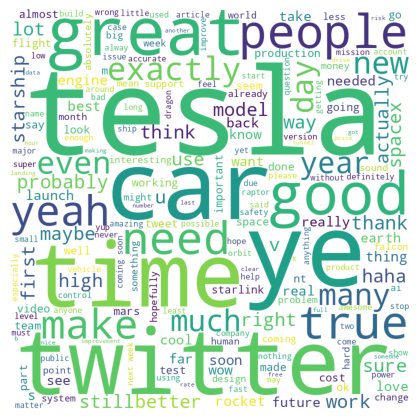

In [27]:
#FIRST WORD CLOUD (Column:lemmatized_text )

#Concatenate all the preprocessed text together
all_text = ' '.join(bd_tw['preprocessed_text'])

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(all_text)

# Plot the word cloud
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


### Feature engineering


#### We'll also test some new columns.

    -Creat a new column with the @users tagged in the twits
    -Well use named entity recognition to see what other information we can get
    
    -1. Add a new column for text length
    -2. Extract Emojis from the raw text column using a regular expression to match any emoji
    -3. Extract interactions with other users, creating a new column called "usernames".
    
    
   #### Notas:
   
       -Necesito hacer que los emojis solo aparezcan una vez en la columna emoji

In [22]:
bd_tw.head(60)

,date,text,text_length,preprocessed_text,lemmatized_text,usernames,emoji,hour
0,2023-05-29,@mattyglesias now answer the question,37,answer question,answer question,@mattyglesias,,22
1,2023-05-29,@mattyglesias insufferable numbskull,36,insufferable numbskull,insufferable numbskull,@mattyglesias,,22
2,2023-05-29,@endwokeness yes,16,yes,yes,@endwokeness,,21
3,2023-05-29,@sethdillon 🤣,13,,,@sethdillon,🤣,20
4,2023-05-29,@teslaownersebay @stevenmarkryan @wholemarsblo...,107,later year definitely needs happen,later year definitely need happen,"@teslaownersebay,@stevenmarkryan,@wholemarsblo...",,19
5,2023-05-29,"also, you can now change video playback speed",45,also change video playback speed,also change video playback speed,NaN,,19
6,2023-05-29,@krassenstein this is pretty cool,33,pretty cool,pretty cool,@krassenstein,,19
7,2023-05-29,@stevenmarkryan @wholemarsblog heard diablo iv...,94,heard diablo iv might good remake system shoc...,heard diablo iv might good remake system shock...,"@stevenmarkryan,@wholemarsblog",,19
8,2023-05-29,@joeys_lady @stevenmarkryan @wholemarsblog true,47,true,true,"@joeys_lady,@stevenmarkryan,@wholemarsblog",,18
9,2023-05-29,@drknowitall16 coming soon,26,coming soon,come soon,@drknowitall16,,18


In [17]:
# 1. Add a new column for text length
bd_tw.loc[:, 'text_length'] = bd_tw['text'].str.len()

In [18]:
#2. Extract Emojis from the raw text column using a regular expression to match any emoji
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

# Define a function that extracts unique emojis from a string
def extract_unique_emojis(text):
    emojis = re.findall(emoji_pattern, text)
    unique_emojis = list(set(emojis))
    return ', '.join(unique_emojis)

# Apply the function to the 'text' column and assign the result to the 'emoji' column
bd_tw['emoji'] = bd_tw['text'].apply(extract_unique_emojis)



In [19]:
#3. Creating a new column called "usernames"
bd_tw['usernames'] = bd_tw['text'].str.extractall(r'(@\w+)')[0].groupby(level=0).apply(','.join)


In [21]:
#re arrange columns every time is needed
arranged_columns = ['date', 'text', 'text_length', 'preprocessed_text', 'lemmatized_text', 'usernames', 'emoji']
bd_tw = bd_tw[arranged_columns + [col for col in bd_tw.columns if col not in arranged_columns]]


### Findings

#### The data base:

    -Records twits from 2010-06-04 to 2023-05-29
    -Has emojis (which can help the sentiment analysis)
    -"@" refers to people (which we can try to use to valuate sentiments with other people)

## 3. Exploratory Analysis:

Well do some exploration to increase our knowledge about the data:

    -¿What months does he twit the most? On average Elon twits more in the months of May and Apr
    

    

In [ ]:
# Extract month from date column
bd_tw['month'] = bd_tw['date'].dt.month
# Calculate tweet counts for each month
monthly_tweets = bd_tw['month'].value_counts().sort_index()

# Generate the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_tweets.index, y=monthly_tweets.values, color='b')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.title('Average Number of Tweets per Month')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [ ]:
# Get a Series with usernames as index and their counts as values
username_counts = bd_tw['usernames'].value_counts()

# Convert the Series to a DataFrame for better visualisation
username_counts_df = username_counts.reset_index()

# Rename the columns for clarity
username_counts_df.columns = ['usernames', 'count']

# Display the DataFrame
print(username_counts_df)


In [ ]:
print(username_counts_df.head(50))


In [ ]:
bd_tw['year'] = bd_tw['date'].dt.year


In [ ]:
# Group by year and username, count the number of occurrences of each pair
username_counts_year = bd_tw.groupby(['year', 'usernames']).size()

# Iterate over each year and print the top usernames
for year in bd_tw['year'].unique():
    top_usernames = username_counts_year[year].nlargest(10)
    print(f"Top usernames for year {year}:")
    print(top_usernames)
    print()


In [ ]:

# Group by year and count the number of tweets per year
tweet_counts_per_year = bd_tw['year'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(tweet_counts_per_year.index, tweet_counts_per_year.values)
plt.xlabel('Year')
plt.ylabel('Tweet Count')
plt.title('Tweet Counts per Year')
plt.xticks(rotation=45)
plt.show()

In [ ]:
unique_emojis = bd_tw['emoji'].unique()
print(unique_emojis)

In [ ]:
# Create a new column 'emoji' and initialize it as empty
bd_tw['emoji'] = ''

# Iterate over each row in the DataFrame
for index, row in bd_tw.iterrows():
    text = row['text']
    emojis = re.findall(emoji_pattern, text)
    unique_emojis = set(emojis)
    bd_tw.at[index, 'emoji'] = ' '.join(unique_emojis)

# Count the occurrences of each emoji
emoji_counts = bd_tw['emoji'].str.split(expand=True).stack().value_counts()

# Print the most appeared emojis
print("Top appeared emojis:")
print(emoji_counts.head())




## Sentiment Analysis

For this part of the work, I would like to acknowledge and cite the previous work conducted by my teacher, mentor, and friend.

"... but what if we don't have labels?"

Using the libraries shown in her course, we will measure the following:

##### Subjectivity

We will utilize the TextBlob library, which assigns values between [0, 1]. A value closer to 0 indicates factual information, while a value closer to 1 represents a personal opinion.

To provide a potentially more accurate interpretation of Elon's communication, we will manually assign margins for this measure. Our goal is to focus on tweets that closely align with Elon's personal opinions (=> 0.501).

The intention is to subset the tweets that best reflect Elon's opinions, rather than repetitive facts. I understand that this approach requires detailed consideration to optimize the results, but it is chosen to reduce the computational workload for emotion labeling.

##### Emotion

We will employ the Distilbert-base-uncased-emotion model, which has been fine-tuned using the HuggingFace Trainer and dataset. The tweets will be labeled with the perceived emotion from the following categories: Sadness, Joy, Love, Anger, Fear, Surprise.

The model's performance metrics are as follows:

Accuracy: 93.8

F1 Score: 93.79

Test Samples per Second: 398.69



In [109]:
import random

# Set the seed for random number generation
random.seed(42)  # You can change the seed value (e.g., 42) to any desired integer

rand_row = random.randint(0, len(bd_tw))

# Print the 'text' column
text_value = bd_tw.loc[rand_row, 'text']
print("Text:", text_value)
print()

# Print the 'preprocessed_text' column
preprocessed_text_value = bd_tw.loc[rand_row, 'preprocessed_text']
print("Preprocessed Text:", preprocessed_text_value)
print()

# Print the 'lemmatized_text' column
lemmatized_text_value = bd_tw.loc[rand_row, 'lemmatized_text']
print("Lemmatized Text:", lemmatized_text_value)
print()


Text: i love floors

Preprocessed Text: love floors

Lemmatized Text: love floor



In [115]:
# Calculate and print subjectivity and polarity for 'lemmatized_text' column
text_blob_lemmatized = TextBlob(lemmatized_text_value)
subjectivity_lemmatized = text_blob_lemmatized.sentiment.subjectivity
polarity_lemmatized = text_blob_lemmatized.sentiment.polarity
print("Lemmatized Text:")
print()
print("Subjectivity:", subjectivity_lemmatized)
print()
print("Polarity:", polarity_lemmatized)
print()


##SEED TESTING

#42 es igual
#43 es igual
#44 es diferente (mejor ejemplo)


Lemmatized Text:

Subjectivity: 0.6

Polarity: 0.5



In [112]:
specific_model = pipeline(model="bhadresh-savani/distilbert-base-uncased-emotion")


In [114]:
print("lemmatized_text_value")
print(specific_model(lemmatized_text_value))
print()


print()

lemmatized_text_value
[{'label': 'love', 'score': 0.565528392791748}]


